## Problem Statement:

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. So we need to forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately.

In [1]:
#Importing required libraries 
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
# Reading CSV file
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
df = pd.concat([df_train,df_test])

In [4]:
# Last five rows
df.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,NaN
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,NaN
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,NaN
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,NaN
13859,232287,01/10/13,9984,679023,234.4125,234.4125,0,0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164010 entries, 0 to 13859
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        164010 non-null  int64  
 1   week             164010 non-null  object 
 2   store_id         164010 non-null  int64  
 3   sku_id           164010 non-null  int64  
 4   total_price      164009 non-null  float64
 5   base_price       164010 non-null  float64
 6   is_featured_sku  164010 non-null  int64  
 7   is_display_sku   164010 non-null  int64  
 8   units_sold       150150 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 12.5+ MB


In [6]:
# Converting the required column in category
df['is_featured_sku'].astype('category')
df['is_display_sku'].astype('category')

0        0
1        0
2        0
3        0
4        0
        ..
13855    0
13856    0
13857    1
13858    0
13859    0
Name: is_display_sku, Length: 164010, dtype: category
Categories (2, int64): [0, 1]

In [7]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['store_id']= label_encoder.fit_transform(df['store_id'])
df['sku_id']= label_encoder.fit_transform(df['sku_id'])

In [8]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,3,1,99.0375,111.8625,0,0,20.0
1,2,17/01/11,3,2,99.0375,99.0375,0,0,28.0
2,3,17/01/11,3,3,133.9500,133.9500,0,0,19.0
3,4,17/01/11,3,0,133.9500,133.9500,0,0,44.0
4,5,17/01/11,3,5,141.0750,141.0750,0,0,52.0


In [9]:
# Checking the shape of the data
df.shape

(164010, 9)

In [10]:
# Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164010 entries, 0 to 13859
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        164010 non-null  int64  
 1   week             164010 non-null  object 
 2   store_id         164010 non-null  int64  
 3   sku_id           164010 non-null  int64  
 4   total_price      164009 non-null  float64
 5   base_price       164010 non-null  float64
 6   is_featured_sku  164010 non-null  int64  
 7   is_display_sku   164010 non-null  int64  
 8   units_sold       150150 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 12.5+ MB


In [11]:
# Checking the statistics of the data
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,164010.000000,164010.000000,164010.000000,164009.000000,164010.000000,164010.000000,164010.000000,150150.000000
mean,116090.309664,37.012121,9.662338,207.096792,219.805933,0.094848,0.133211,51.674206
std,67059.235114,22.391351,6.586134,102.499506,110.351869,0.293006,0.339804,60.207904
min,1.000000,0.000000,0.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,57989.250000,17.000000,4.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,116054.500000,36.000000,10.000000,198.787500,208.050000,0.000000,0.000000,35.000000
75%,174176.750000,57.000000,14.000000,234.412500,235.837500,0.000000,0.000000,62.000000
max,232287.000000,75.000000,27.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [12]:
df.drop(['record_ID','week'],axis=1,inplace =True)

In [13]:
# Checking null values
df.isnull().sum()

store_id               0
sku_id                 0
total_price            1
base_price             0
is_featured_sku        0
is_display_sku         0
units_sold         13860
dtype: int64

In [14]:
df['total_price'].fillna(df['total_price'].mean(),inplace=True)

In [15]:
df.isnull().sum()
# No missing values left

store_id               0
sku_id                 0
total_price            0
base_price             0
is_featured_sku        0
is_display_sku         0
units_sold         13860
dtype: int64

<AxesSubplot:>

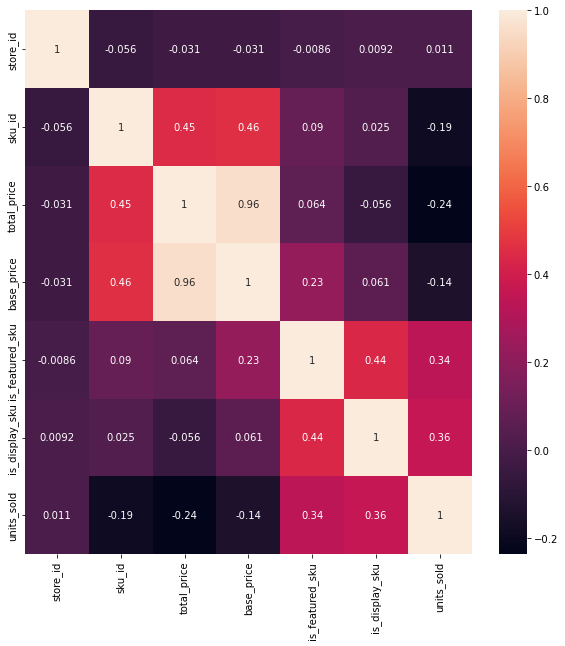

In [16]:
# Correlation among the features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# We can see that the correlation between total_price and base_price is huge i.e 0.96.

In [17]:
df_num = df.copy()

In [18]:
df_num.drop(['units_sold'],axis = 1,inplace = True)

In [19]:
df_num

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,3,1,99.0375,111.8625,0,0
1,3,2,99.0375,99.0375,0,0
2,3,3,133.9500,133.9500,0,0
3,3,0,133.9500,133.9500,0,0
4,3,5,141.0750,141.0750,0,0
...,...,...,...,...,...,...
13855,75,13,241.5375,241.5375,0,0
13856,75,12,240.8250,240.8250,0,0
13857,75,14,382.6125,401.8500,1,1
13858,75,24,191.6625,191.6625,0,0


In [20]:
# Removing week from the dataset for Checking variance inflation factor
vif = pd.DataFrame()
vif["variables"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
vif

,variables,VIF
0,store_id,2.444225
1,sku_id,3.810383
2,total_price,94.148830
3,base_price,99.544426
4,is_featured_sku,1.817406
5,is_display_sku,1.468774


In [21]:
df.drop('base_price',axis=1,inplace=True)

In [22]:
df.head()

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold
0,3,1,99.0375,0,0,20.0
1,3,2,99.0375,0,0,28.0
2,3,3,133.9500,0,0,19.0
3,3,0,133.9500,0,0,44.0
4,3,5,141.0750,0,0,52.0


In [23]:
df.columns

Index(['store_id', 'sku_id', 'total_price', 'is_featured_sku',
       'is_display_sku', 'units_sold'],
      dtype='object')

C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_price', ylabel='Density'>

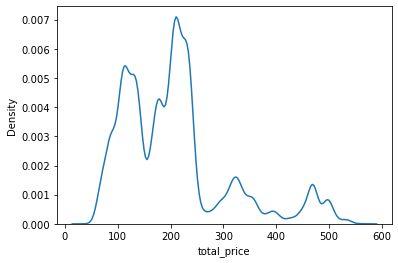

In [24]:
sns.distplot(df['total_price'],hist=False)

C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_price_log', ylabel='Density'>

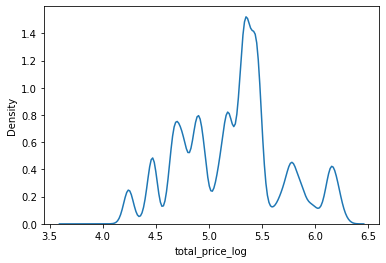

In [25]:
df['total_price_log'] = np.log(df['total_price'])
sns.distplot(df['total_price_log'], hist =False)

In [26]:
df

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,total_price_log
0,3,1,99.0375,0,0,20.0,4.595499
1,3,2,99.0375,0,0,28.0,4.595499
2,3,3,133.9500,0,0,19.0,4.897467
3,3,0,133.9500,0,0,44.0,4.897467
4,3,5,141.0750,0,0,52.0,4.949292
...,...,...,...,...,...,...,...
13855,75,13,241.5375,0,0,NaN,5.487025
13856,75,12,240.8250,0,0,NaN,5.484071
13857,75,14,382.6125,1,1,NaN,5.947023
13858,75,24,191.6625,0,0,NaN,5.255736


In [27]:
df_test=df[df['units_sold'].isnull()]
df_train=df[~df['units_sold'].isnull()]

C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='units_sold', ylabel='Density'>

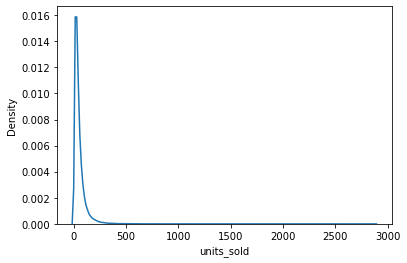

In [28]:
sns.distplot(df_train['units_sold'],hist=False)

C:\Users\Shikha saraswat\AppData\Local\Temp\ipykernel_18524\3356444588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['units_sold_log'] = np.log(df_train['units_sold'])
C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='units_sold_log', ylabel='Density'>

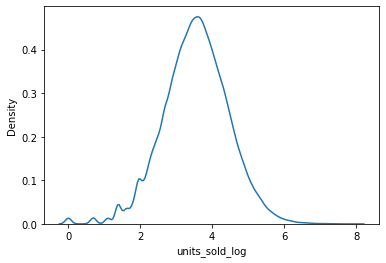

In [29]:
df_train['units_sold_log'] = np.log(df_train['units_sold'])
sns.distplot(df_train['units_sold_log'], hist =False)

In [30]:
df_train.head()

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,total_price_log,units_sold_log
0,3,1,99.0375,0,0,20.0,4.595499,2.995732
1,3,2,99.0375,0,0,28.0,4.595499,3.332205
2,3,3,133.9500,0,0,19.0,4.897467,2.944439
3,3,0,133.9500,0,0,44.0,4.897467,3.784190
4,3,5,141.0750,0,0,52.0,4.949292,3.951244


In [31]:
df_train.drop(['total_price','units_sold'],axis =1,inplace=True)

C:\Users\Shikha saraswat\AppData\Local\Temp\ipykernel_18524\2304766257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['total_price','units_sold'],axis =1,inplace=True)


In [32]:
df_train

,store_id,sku_id,is_featured_sku,is_display_sku,total_price_log,units_sold_log
0,3,1,0,0,4.595499,2.995732
1,3,2,0,0,4.595499,3.332205
2,3,3,0,0,4.897467,2.944439
3,3,0,0,0,4.897467,3.784190
4,3,5,0,0,4.949292,3.951244
...,...,...,...,...,...,...
150145,75,13,0,0,5.463143,3.637586
150146,75,12,0,0,5.463143,3.401197
150147,75,14,1,1,5.879625,3.433987
150148,75,24,0,1,4.954329,2.484907


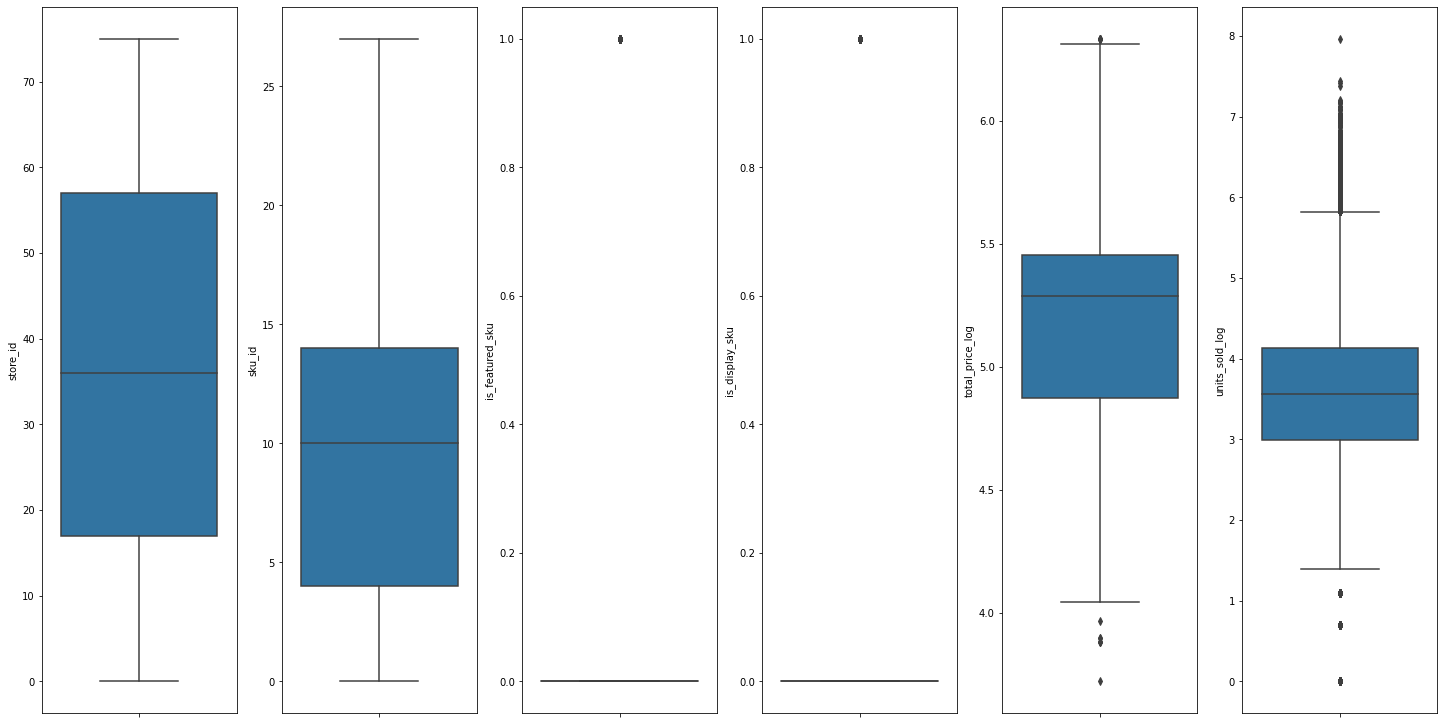

In [33]:
# creating box plots
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df_train.items():
    sns.boxplot(y=col, data=df_train, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='units_sold_log'>

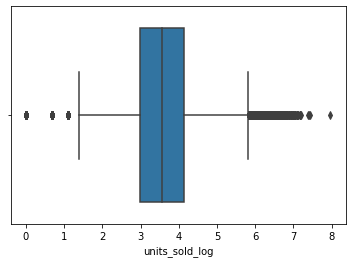

In [34]:
# Checking outliers in units_sold_log
sns.boxplot(df_train['units_sold_log'])

In [35]:
# Removing outliers using percentile method

totChol_1 = np.percentile(df_train['units_sold_log'], 1)
totChol_90 = np.percentile(df_train['units_sold_log'], 99)

df_train.loc[df_train['units_sold_log']<totChol_1 , ['units_sold_log']] = totChol_1
df_train.loc[df_train['units_sold_log']>totChol_90 ,['units_sold_log']] = totChol_90

C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='units_sold_log'>

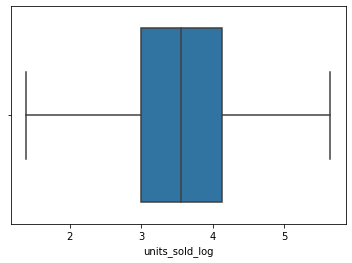

In [36]:
# Checking outliers again in units_sold column
sns.boxplot(df_train['units_sold_log'])

In [37]:
df_train.shape

(150150, 6)

In [38]:
df_train.head()

,store_id,sku_id,is_featured_sku,is_display_sku,total_price_log,units_sold_log
0,3,1,0,0,4.595499,2.995732
1,3,2,0,0,4.595499,3.332205
2,3,3,0,0,4.897467,2.944439
3,3,0,0,0,4.897467,3.784190
4,3,5,0,0,4.949292,3.951244


In [39]:
df_test.drop('units_sold',axis=1,inplace=True)

C:\Users\Shikha saraswat\AppData\Local\Temp\ipykernel_18524\1235086228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('units_sold',axis=1,inplace=True)


In [40]:
df_test.drop('total_price',axis=1,inplace=True)

C:\Users\Shikha saraswat\AppData\Local\Temp\ipykernel_18524\1864976468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('total_price',axis=1,inplace=True)


In [41]:
df_train.head()

,store_id,sku_id,is_featured_sku,is_display_sku,total_price_log,units_sold_log
0,3,1,0,0,4.595499,2.995732
1,3,2,0,0,4.595499,3.332205
2,3,3,0,0,4.897467,2.944439
3,3,0,0,0,4.897467,3.784190
4,3,5,0,0,4.949292,3.951244


In [42]:
df_test

,store_id,sku_id,is_featured_sku,is_display_sku,total_price_log
0,3,1,0,0,4.684905
1,3,2,0,0,4.691463
2,3,3,0,0,4.897467
3,3,0,0,0,4.897467
4,3,5,0,0,5.174453
...,...,...,...,...,...
13855,75,13,0,0,5.487025
13856,75,12,0,0,5.484071
13857,75,14,1,1,5.947023
13858,75,24,0,0,5.255736


C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shikha saraswat\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


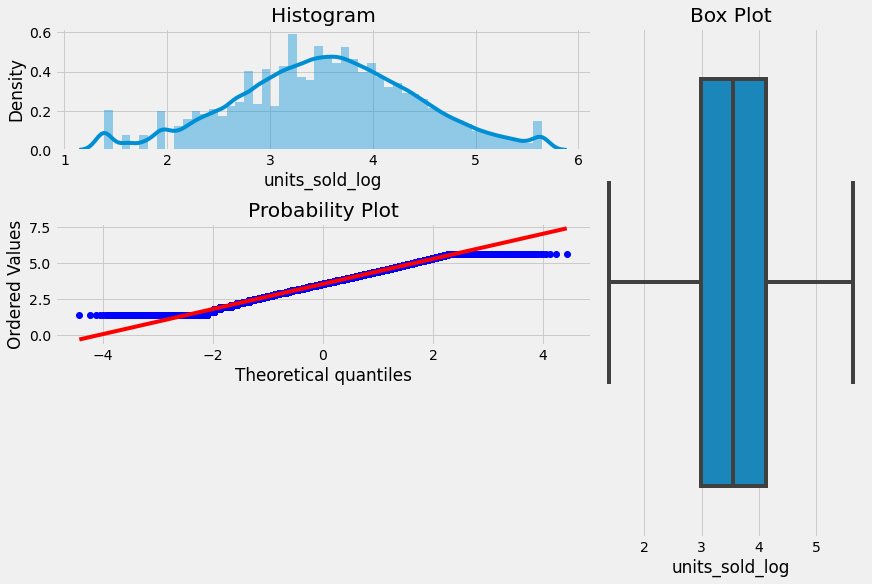

In [43]:
def plotting_3_chart(dataf, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(dataf.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(dataf.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(dataf.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(df_train, 'units_sold_log')

#### Dividing data in features_column(X) and target_column(y)

In [44]:
X =df_train.drop('units_sold_log',axis=1)

In [45]:
X

,store_id,sku_id,is_featured_sku,is_display_sku,total_price_log
0,3,1,0,0,4.595499
1,3,2,0,0,4.595499
2,3,3,0,0,4.897467
3,3,0,0,0,4.897467
4,3,5,0,0,4.949292
...,...,...,...,...,...
150145,75,13,0,0,5.463143
150146,75,12,0,0,5.463143
150147,75,14,1,1,5.879625
150148,75,24,0,1,4.954329


In [46]:
y = df_train['units_sold_log']

In [47]:
# Performing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [48]:
y_test

144782    3.713572
117       2.564949
77408     5.645447
62193     2.639057
143901    1.386294
            ...   
96305     2.397895
137737    3.401197
41040     3.218876
33950     3.761200
44961     3.044522
Name: units_sold_log, Length: 49550, dtype: float64

In [49]:
# Applying linear regression algorithm
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
# Checking  the length of every set of data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100600, 5) (49550, 5) (100600,) (49550,)


In [51]:
y_pred = regressor.predict(X_train)
y_pred.shape

(100600,)

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred)

0.5582303164731357

In [53]:
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt(mean_squared_log_error(y_train, y_pred))

### Root Mean Squared Log Error

In [54]:
# Root Mean Squared Log Error
RMSLE

0.1765851538813464

#### 100*RMSLE (Root Mean Squared Log Error).

In [55]:
100*RMSLE

17.658515388134642

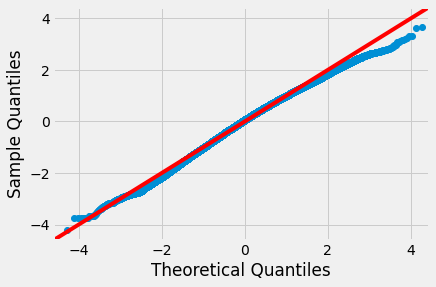

In [56]:
import statsmodels.api as sm
mod_fit = sm.OLS(y_train,X_train).fit()
res = mod_fit.resid
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

In [57]:
# OLS summary
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         units_sold_log   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          3.347e+05
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:35:52   Log-Likelihood:                     -1.2869e+05
No. Observations:              100600   AIC:                                  2.574e+05
Df Residuals:                  100595   BIC:                                  2.574e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [58]:
X_test

,store_id,sku_id,is_featured_sku,is_display_sku,total_price_log
144782,25,12,0,0,5.358118
117,8,20,0,0,5.327451
77408,5,12,1,1,4.944228
62193,61,14,0,0,6.210675
143901,44,6,0,0,5.472166
...,...,...,...,...,...
96305,28,0,0,0,4.892133
137737,18,16,0,0,4.697977
41040,41,12,0,0,5.358118
33950,29,8,0,0,5.745524


In [59]:
# Prediction on the data given on problem statement
X_test_predict = regressor.predict(X_test)

In [60]:
X_test_predict

array([3.27961775, 3.02046254, 4.62382704, ..., 3.28271274, 3.28595964,
       3.09894368])

In [61]:
# Unscaled value i.e using exponential to convert it in default form
y_org = np.exp(X_test_predict)
y_org

array([ 26.56561609,  20.50077184, 101.88319755, ...,  26.64796363,
        26.73462773,  22.17451561])